In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_pr_curve(result_tables):

    # plt.style.use('ggplot')
    save_path = f'results_cov/2023/plots/metrics/'

    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(27, 10))
    labels = []
    ls = []

    for idx, result_table in enumerate(result_tables):
        for i in result_table.index:
            model = result_table.loc[i]['Model']
            if model == 'attention': model = 'tempel (attention)'
            if model == 'da-rnn': model = 'tempel (da-rnn)'
            labels.append(model)
            if model == 'baseline':
                l = axes[idx].plot(result_table.loc[i]['Recall'], 
                        result_table.loc[i]['Precision'], 
                        label=f'{model}',
                        color = 'orange',
                        linestyle='--')
            else:
                l = axes[idx].plot(result_table.loc[i]['Recall'], 
                        result_table.loc[i]['Precision'], 
                        label=f'{model}')

            ls.append(l)

        axes[idx].set_xticks(np.arange(0.0, 1.1, step=0.1))  
        count = chr(ord("a")+idx)
        axes[idx].set_xlabel(f'({count}) k = {(idx+1)*3}', fontweight='bold', fontsize=20)
        # axes[idx].set_yticks(np.arange(0.0, 1.1, step=0.1))  
        
    fig.supxlabel("Recall", fontweight='bold', fontsize=25)
    fig.supylabel("Precision", fontweight='bold', fontsize=25)
    fig.suptitle("PR Curves", fontweight='bold', fontsize=35)

    plt.legend(prop={'size':13}, loc='lower left')

    plt.autoscale()
    fig.tight_layout(pad=3)
    plt.savefig(save_path + f'/pr_curve.pdf', format='pdf', dpi=600)


def plot_roc_curve(result_tables):

    # plt.style.use('ggplot')
    save_path = f'results_cov/2023/plots/metrics/'

    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(27, 10))
    labels = []
    ls = []

    for idx, result_table in enumerate(result_tables):
        for i in result_table.index:
            model = result_table.loc[i]['Model']
            if model == 'attention': model = 'tempel (attention)'
            if model == 'da-rnn': model = 'tempel (da-rnn)'
            labels.append(model)
            if model == 'baseline':
                l = axes[idx].plot(result_table.loc[i]['fpr'], 
                        result_table.loc[i]['tpr'], 
                        label=f'{model}',
                        color = 'orange',
                        linestyle='--')
            else:
                l = axes[idx].plot(result_table.loc[i]['fpr'], 
                        result_table.loc[i]['tpr'], 
                        label=f'{model}')
        
        axes[idx].set_xticks(np.arange(0.0, 1.1, step=0.1))  
        axes[idx].set_yticks(np.arange(0.0, 1.1, step=0.1))  
        count = chr(ord("a")+idx)
        axes[idx].set_xlabel(f'({count}) k = {(idx+1)*3}', fontweight='bold', fontsize=20)  

    
    fig.supxlabel("False Positive Rate", fontweight='bold', fontsize=25)
    fig.supylabel("True Positive Rate", fontweight='bold', fontsize=25)
    fig.suptitle("ROC Curves", fontweight='bold', fontsize=35)

    plt.legend(prop={'size':13}, loc='lower right')

    plt.autoscale()
    fig.tight_layout(pad=3)
    
    plt.savefig(save_path + f'/roc_curve.pdf', format='pdf', dpi=600)
    


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_curves(pr_result_tables, roc_result_tables):

    # plt.style.use('seaboen-v0_8-notebook')
    save_path = 'results_cov/tests'

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(27, 15), sharex='row', sharey='row')
    labels = []

    for idx, (pr_table, roc_table) in enumerate(zip(pr_result_tables, roc_result_tables)):
        for i in pr_table.index:
            model = pr_table.loc[i]['Model']
            if model == 'attention':
                model = 'tempel (attention)'
            if model == 'da-rnn':
                model = 'tempel (da-rnn)'
            labels.append(model)
            linestyle = '--' if model == 'baseline' else '-'

            # Plot PR curve
            axes[0, idx].plot(pr_table.loc[i]['Recall'], 
                             pr_table.loc[i]['Precision'], 
                             label=f'{model}',
                             linestyle=linestyle)

        for i in roc_table.index:
            model = roc_table.loc[i]['Model']
            if model == 'attention':
                model = 'tempel (attention)'
            if model == 'da-rnn':
                model = 'tempel (da-rnn)'
            labels.append(model)
            linestyle = '--' if model == 'baseline' else '-'

            # Plot ROC curve
            axes[1, idx].plot(roc_table.loc[i]['fpr'], 
                             roc_table.loc[i]['tpr'], 
                             label=f'{model}',
                             linestyle=linestyle)

        for row in [0, 1]:
            axes[row, idx].set_xticks(np.arange(0.0, 1.1, step=0.1))  
            axes[row, idx].set_yticks(np.arange(0.0, 1.1, step=0.1))
            count = chr(ord("A") + row * 3 + idx)
            axes[row, idx].set_title(f'({count}) k = {(idx+1)*3}', fontweight='bold', fontsize=20)

    # for i in range(3):
    #     axes[0, i].set(xlabel='x-label', ylabel='y-label')

    # for i in range(3):
    #     axes[1, i].set(xlabel='x-label', ylabel='y-label')

    axes[0, 1].set_xlabel("Recall", fontweight='semibold', fontsize=25)
    axes[0, 0].set_ylabel("Precision ", fontweight='semibold', fontsize=25)
    axes[1, 1].set_xlabel("False Positive Rate", fontweight='semibold', fontsize=25)
    axes[1, 0].set_ylabel("True Positive Rate", fontweight='semibold', fontsize=25)
    # axes[0, 0].set(xlabel='x-label', ylabel='y-label')
    # fig.supxlabel("Recall / False Positive Rate", fontweight='bold', fontsize=25)
    # fig.supylabel("Precision / True Positive Rate", fontweight='bold', fontsize=25)
    # fig.axes[0].set_xlabel("Recall / False Positive Rate", fontweight='bold', fontsize=25)
    fig.suptitle("Precision Recall Curves(A-C) and \nReceiver Operating Characteristics Curve(D-F)", fontweight='bold', fontsize=35)

    # Add legends to the first subplot in each row
    axes[0, 0].legend(prop={'size': 13}, loc='lower left')
    axes[1, 0].legend(prop={'size': 13}, loc='lower right')
    axes[0, 0].set_ylim([0.65, 1.02])
    axes[0, 1].set_ylim([0.65, 1.02])
    axes[0, 2].set_ylim([0.65, 1.02])

    # plt.autoscale()
    # print(len(fig.axes))
    fig.tight_layout(pad=3)
    # plt.text(27, 5, "Precision Recall Curves(a-c)")
    plt.savefig(save_path + '/pr_and_roc_curves.pdf', format='pdf', dpi=600)
    plt.savefig(save_path + '/pr_and_roc_curves.eps', format='eps', dpi=1200)

# Call the combined function with your PR and ROC result tables
# plot_combined_curves(pr_result_tables, roc_result_tables)




In [3]:
converter1={
    'Precision': pd.eval,
    'Recall' : pd.eval
}

converter2={
    'tpr': pd.eval,
    'fpr' : pd.eval
}

In [4]:
pr_3 = pd.read_csv('results_cov/tests/pr_3.csv', converters=converter1)
pr_6 = pd.read_csv('results_cov/tests/pr_6.csv', converters=converter1)
pr_9 = pd.read_csv('results_cov/tests/pr_9.csv', converters=converter1)
roc_3 = pd.read_csv('results_cov/tests/roc_3.csv', converters=converter2)
roc_6 = pd.read_csv('results_cov/tests/roc_6.csv', converters=converter2)
roc_9 = pd.read_csv('results_cov/tests/roc_9.csv', converters=converter2)

In [6]:
pr_6

,Unnamed: 0,Model,Precision,Recall
0,0,our model,"[0.7128859060402685, 0.712909829188899, 0.7129...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,1,tempo,"[0.7128859060402685, 0.7128762710158059, 0.712...","[1.0, 0.9999529278855206, 0.9999529278855206, ..."
2,2,cnn,"[0.7128859060402685, 0.712909829188899, 0.7129...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,3,attention,"[0.7128859060402685, 0.712909829188899, 0.7129...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,4,gru,"[0.7128859060402685, 0.712909829188899, 0.7129...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,5,lstm,"[0.7128859060402685, 0.712909829188899, 0.7129...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,6,da-rnn,"[0.7128859060402685, 0.712909829188899, 0.7129...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,7,rnn,"[0.7128859060402685, 0.712909829188899, 0.7129...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,8,baseline,"[0.7128859060402685, 1.0]","[1.0, 0.0]"


TypeError: 'Axes' object is not subscriptable

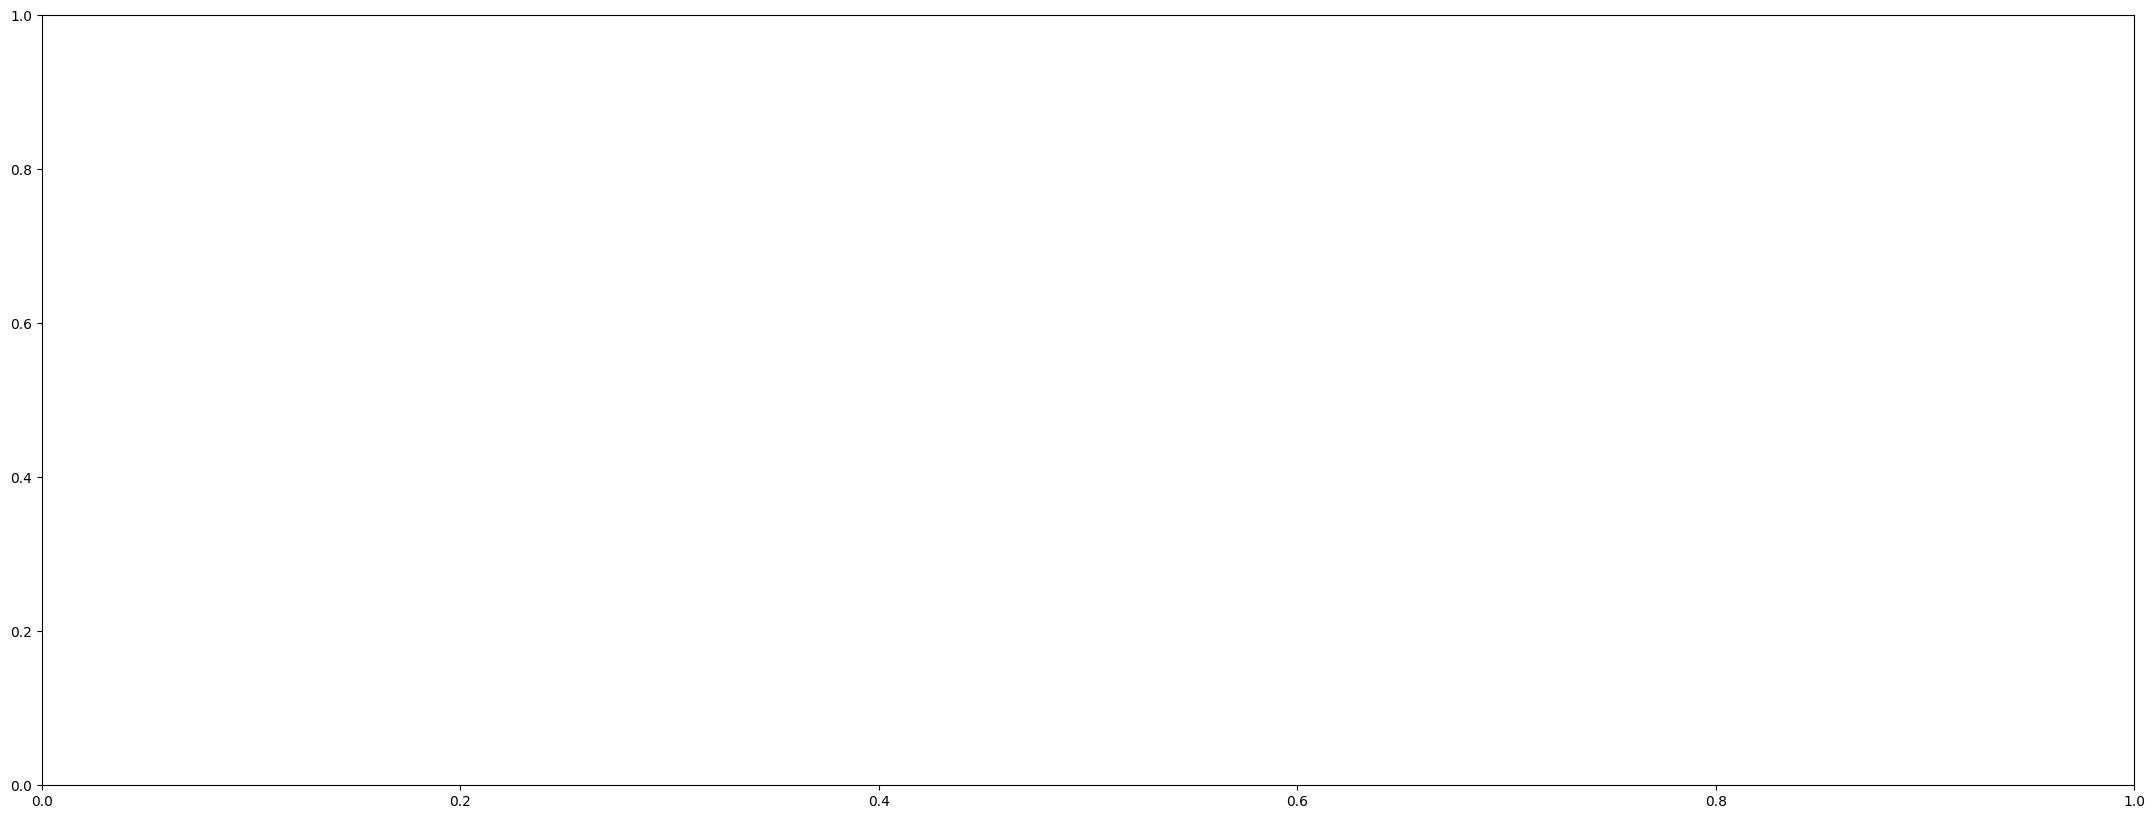

In [9]:
plot_pr_curve([pr_3, pr_6, pr_9])
plot_roc_curve([roc_3, roc_6, roc_9])

In [10]:
pr_9 = pd.read_csv('results_cov/tests/pr_2023.csv', converters=converter1, index_col='Unnamed: 0')
roc_3 = pd.read_csv('results_cov/tests/roc_2023.csv', converters=converter2, index_col='Unnamed: 0')
pr_9

,Model,Precision,Recall
0,PRIEST,"[0.36901565995525726, 0.3690321714618104, 0.37...","[1.0, 1.0, 0.9998181267050621, 0.9998181267050..."
1,tempo,"[0.36901565995525726, 0.36902391552383723, 0.3...","[1.0, 1.0, 1.0, 0.9998181267050621, 0.99981812..."
2,cnn,"[0.36901565995525726, 0.3713828900848965, 0.37...","[1.0, 0.9998181267050621, 0.9996362534101243, ..."
3,attention,"[0.36901565995525726, 0.36902391552383723, 0.3...","[1.0, 1.0, 1.0, 0.9998181267050621, 0.99981812..."
4,gru,"[0.36901565995525726, 0.3713661645162017, 0.37...","[1.0, 0.9998181267050621, 0.9998181267050621, ..."
5,lstm,"[0.36901565995525726, 0.36902391552383723, 0.3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99981812..."
6,da-rnn,"[0.36901565995525726, 0.3713828900848965, 0.37...","[1.0, 0.9998181267050621, 0.9998181267050621, ..."
7,rnn,"[0.36901565995525726, 0.3713661645162017, 0.37...","[1.0, 0.9998181267050621, 0.9996362534101243, ..."
8,baseline,"[0.36901565995525726, 1.0]","[1.0, 0.0]"


In [12]:
pr_9.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [13]:
for i in pr_9.index:
    print(i)

0
1
2
3
4
5
6
7
8


TypeError: 'Axes' object is not subscriptable

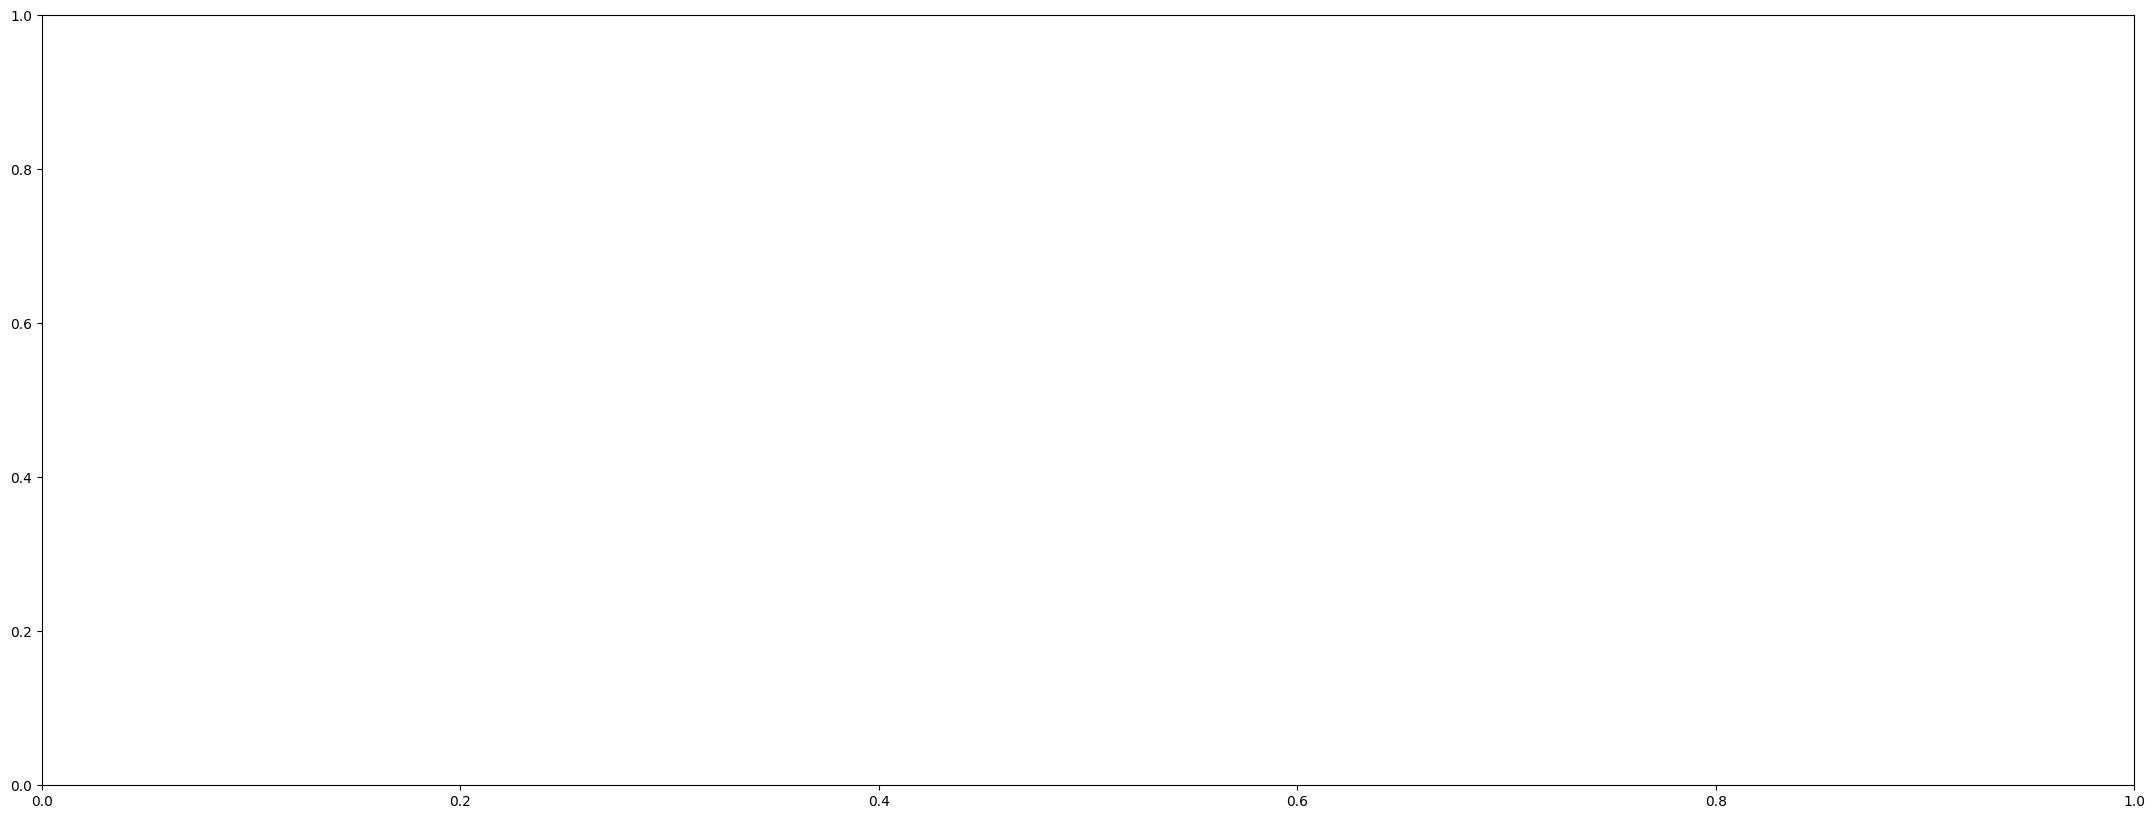

In [16]:
plot_pr_curve([pr_9])
plot_roc_curve([roc_3])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


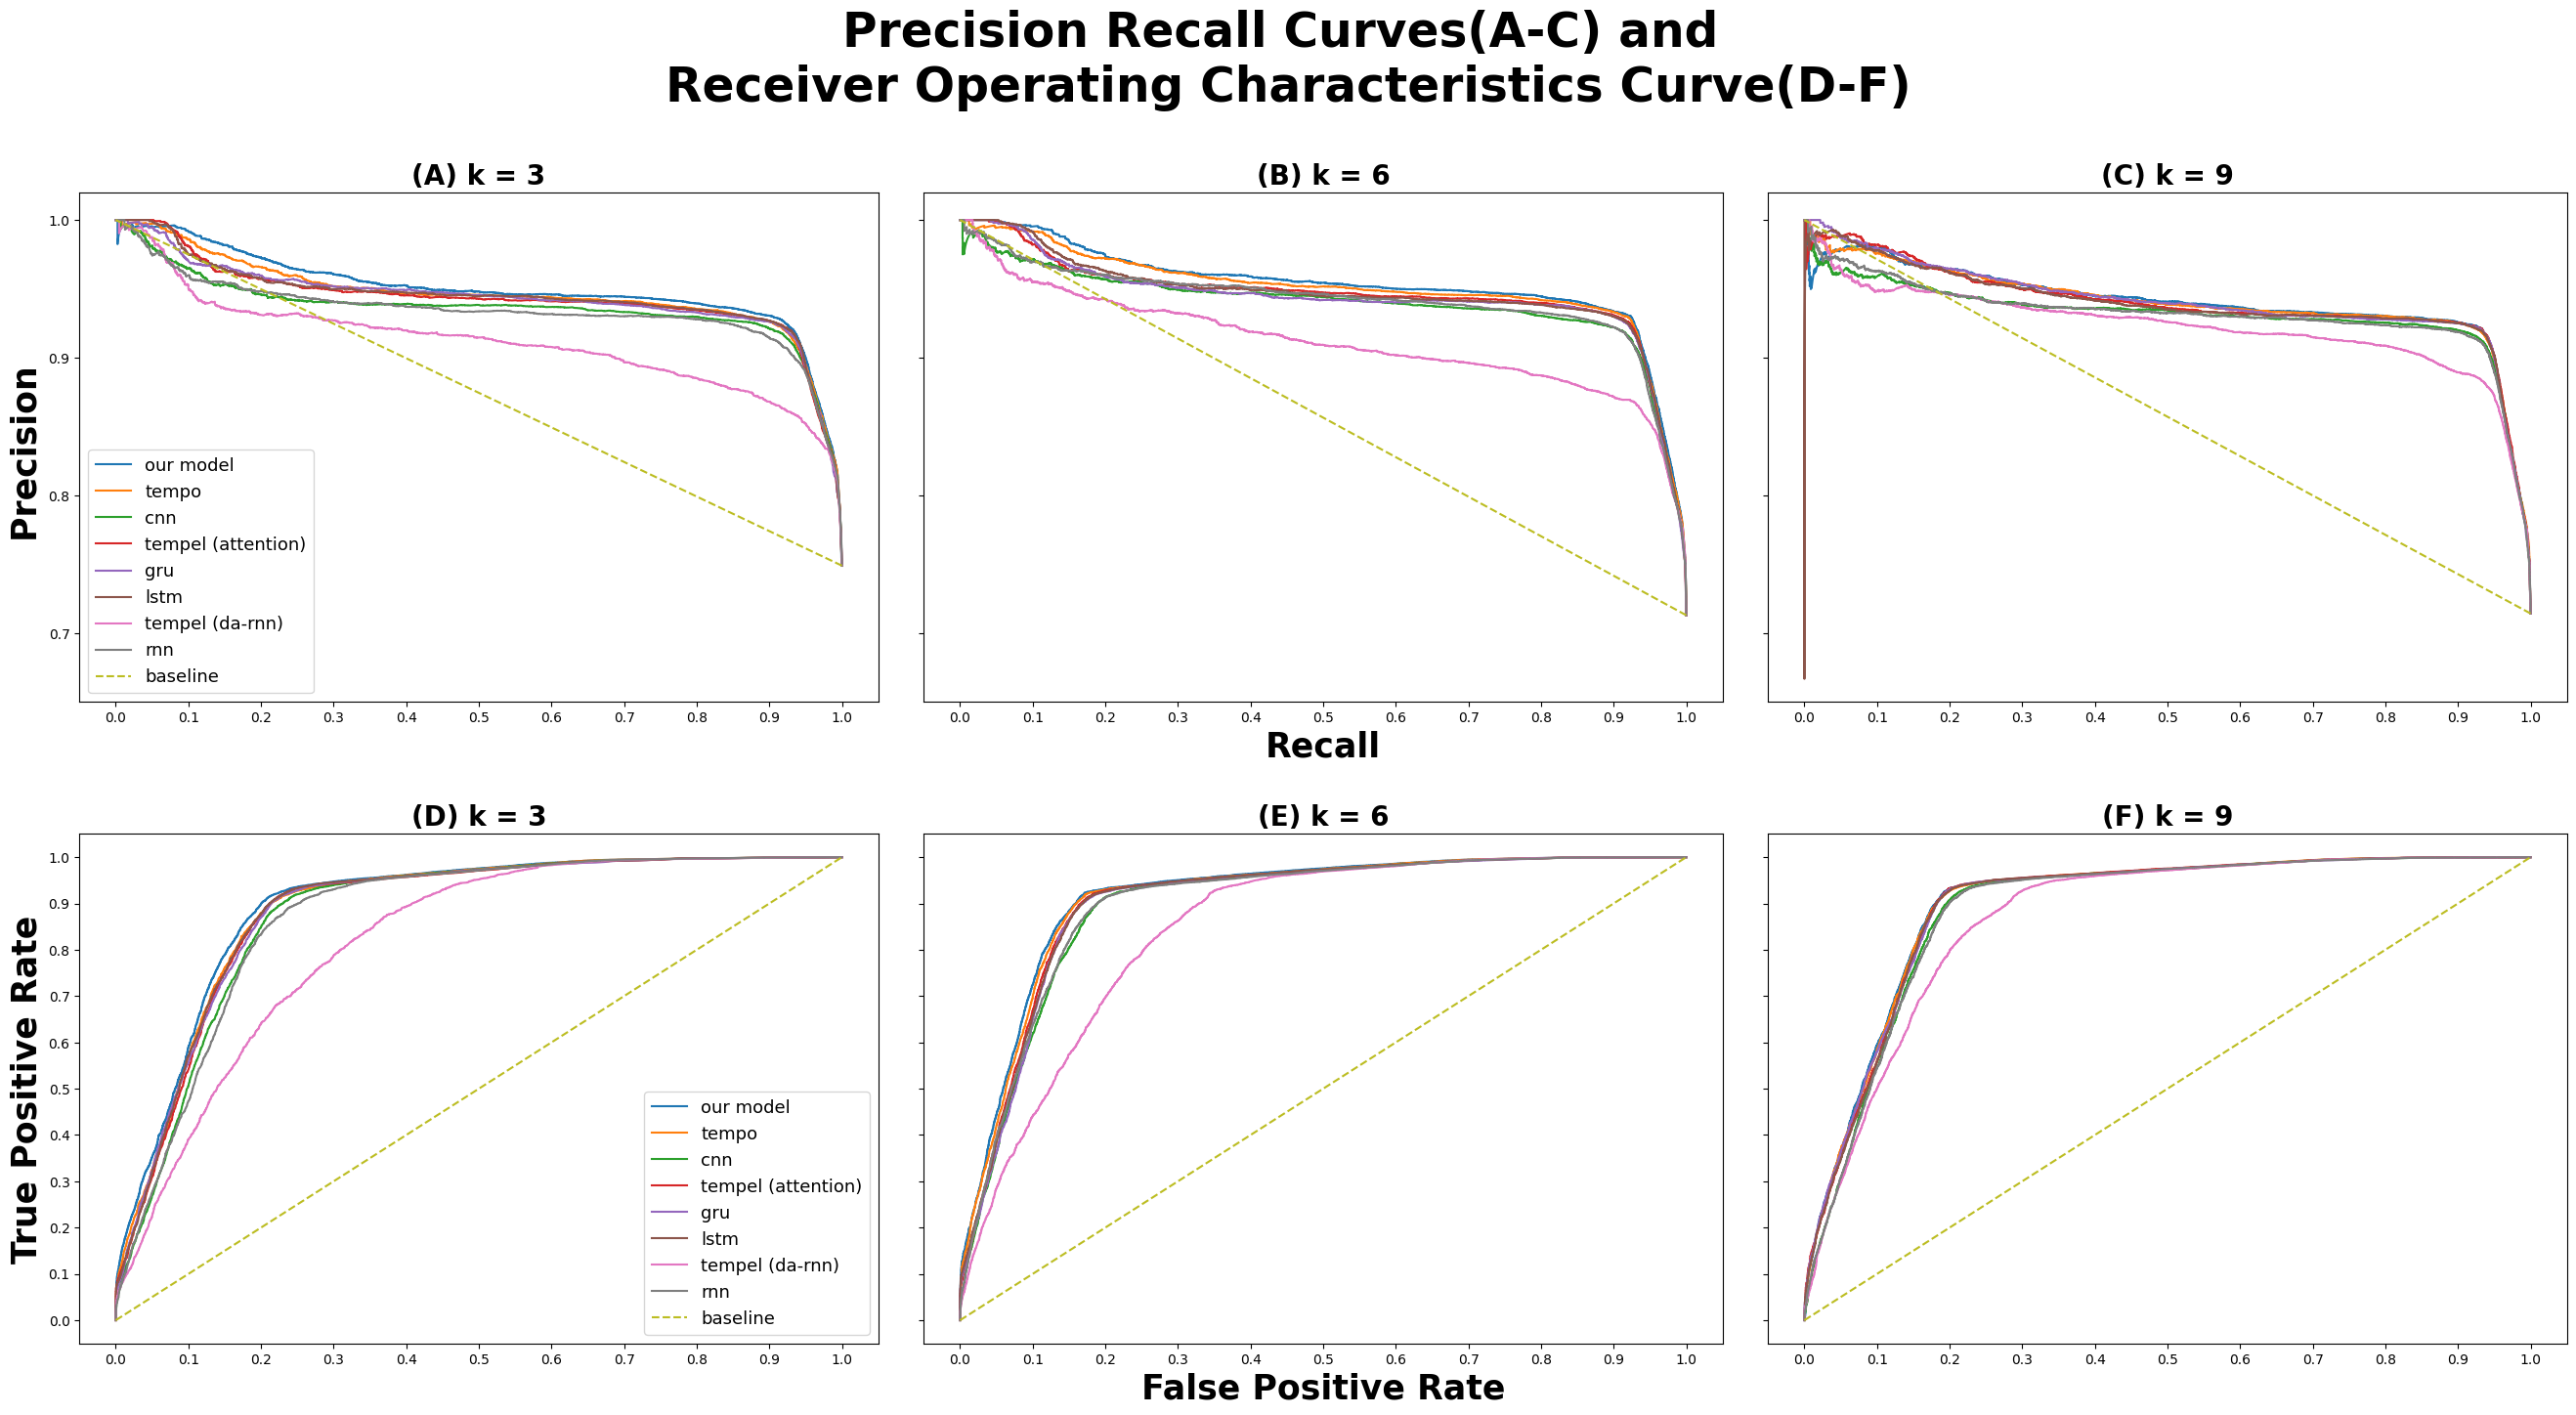

In [8]:
# Call the combined function with your result_tables
plot_combined_curves([pr_3, pr_6, pr_9], [roc_3, roc_6, roc_9])

## Label analysis

In [5]:
import torch

t = torch.load('results_cov/our_model_labels.tensor')
t

tensor([1, 0, 0,  ..., 0, 0, 0], device='cuda:0')

### Mutation Site Analysis

In [1]:
import re

def read_epitopes():
    path = 'data/cov_epitopes/epitopes.txt'
    epitopes = set()
    with open(path, 'r') as f:
        for line in f:
            bound = re.split(r'-|–', line)
            if len(bound) == 1:
                epitopes.add(int(bound[0]))
            else:
                for i in range(int(bound[0]), int(bound[1])):
                    epitopes.add(i)

    return list(epitopes)

In [2]:
epitopes = read_epitopes()

In [3]:
len(epitopes)

149

In [6]:
t.shape

torch.Size([149000])

In [7]:
t1 = t.reshape((1000, 149))
t1.shape

torch.Size([1000, 149])

In [8]:
t1

tensor([[1, 0, 0,  ..., 1, 1, 0],
        [1, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 1, 1, 1],
        [1, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0')

In [9]:
total = torch.sum(t1, dim=0) / 1000
total.shape

torch.Size([149])

In [10]:
indices = [178,  57, 172,  56 , 97]

In [11]:
t2 = t1[indices]

In [12]:
t2.shape

torch.Size([5, 149])

In [13]:
t2_total = torch.sum(t2, dim=0) / 5
t2_total

tensor([0.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4000, 0.0000, 0.4000,
        0.4000, 0.0000, 0.4000, 0.4000, 0.4000, 0.0000, 0.4000, 0.4000, 0.4000,
        0.6000, 0.4000, 0.4000, 0.0000, 0.4000, 0.0000, 0.0000, 0.4000, 0.4000,
        0.4000, 0.4000, 0.2000, 0.6000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000,
        0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000,
        0.4000, 0.2000, 0.2000, 0.4000, 0.4000, 0.4000, 0.2000, 0.4000, 0.4000,
        0.4000, 0.2000, 0.4000, 0.4000, 0.2000, 0.4000, 0.4000, 0.4000, 0.4000,
        0.4000, 0.4000, 0.4000, 0.2000, 0.4000, 0.2000, 0.4000, 0.4000, 0.4000,
        0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.0000,
        0.0000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.4000, 0.0000, 0.0000,
        0.4000, 0.0000, 0.4000, 0.4000, 1.0000, 0.4000, 0.6000, 0.4000, 0.4000,
        0.4000, 0.2000, 0.4000, 0.6000, 

In [18]:
total

tensor([0.2620, 0.0240, 0.0230, 0.0260, 0.0240, 0.0280, 0.1280, 0.0370, 0.0390,
        0.0430, 0.0840, 0.0840, 0.0840, 0.0810, 0.0920, 0.1500, 0.1780, 0.2560,
        0.2570, 0.2160, 0.2590, 0.2610, 0.2540, 0.1910, 0.1570, 0.2660, 0.2590,
        0.2780, 0.2700, 0.2610, 0.2310, 0.2580, 0.2400, 0.2660, 0.2860, 0.2880,
        0.2940, 0.2760, 0.2290, 0.3170, 0.3150, 0.3130, 0.3100, 0.3100, 0.2280,
        0.3120, 0.3100, 0.3100, 0.3130, 0.3170, 0.3120, 0.3120, 0.2580, 0.2580,
        0.2100, 0.2450, 0.3250, 0.3060, 0.3080, 0.3040, 0.2280, 0.2990, 0.3140,
        0.2660, 0.2260, 0.3130, 0.3090, 0.3020, 0.3010, 0.3710, 0.3800, 0.2950,
        0.3730, 0.2610, 0.3120, 0.3170, 0.3200, 0.2770, 0.2590, 0.2370, 0.2540,
        0.1880, 0.2550, 0.2930, 0.3000, 0.3070, 0.3180, 0.3150, 0.2920, 0.2310,
        0.2260, 0.3360, 0.3640, 0.3590, 0.3300, 0.3680, 0.3040, 0.1780, 0.2760,
        0.3260, 0.2860, 0.2970, 0.2870, 0.8890, 0.2030, 0.3800, 0.2720, 0.2740,
        0.3170, 0.2910, 0.2780, 0.3140, 

In [21]:
t_v, t_i = torch.topk(total, k=20, sorted=True)
t_v, t_i

(tensor([0.9500, 0.8890, 0.7780, 0.6960, 0.6860, 0.6750, 0.6700, 0.6660, 0.6410,
         0.6340, 0.6160, 0.6150, 0.5970, 0.5900, 0.5810, 0.5700, 0.5530, 0.5520,
         0.5500, 0.4940], device='cuda:0'),
 tensor([115, 103, 116, 124, 122, 127, 117, 126, 118, 120, 132, 121, 128, 123,
         130, 129, 131, 125, 119, 114], device='cuda:0'))

In [22]:
epitopes = np.asarray(epitopes)
epitopes[t_i.cpu().numpy()]

array([413, 808, 414, 452, 445, 459, 415, 458, 416, 439, 464, 444, 460,
       446, 462, 461, 463, 453, 417, 405])

In [23]:
e2 = epitopes[t_i.cpu().numpy()]
sorted(e2)

[405,
 413,
 414,
 415,
 416,
 417,
 439,
 444,
 445,
 446,
 452,
 453,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 808]

### Variant Analysis

In [4]:
v = torch.sum(t1, dim=1)
v1 = v / 149
max_percentage, min_percentage = torch.max(v1), torch.min(v1)

In [5]:
v1.shape

torch.Size([1000])

In [6]:
avg, median = torch.mean(v1), torch.median(v1)
avg, median

(tensor(0.3137, device='cuda:0'), tensor(0.1611, device='cuda:0'))

In [30]:
v_p_max, v_i_max = torch.topk(v1, k=5, sorted=True)
v_p_min, v_i_min = torch.topk(v1, k=5, largest=False, sorted=True)

In [31]:
v_p_max, v_i_max

(tensor([0.9799, 0.9664, 0.9664, 0.9597, 0.9530], device='cuda:0'),
 tensor([ 79, 509, 238, 484, 868], device='cuda:0'))

In [32]:
v_p_min, v_i_min

(tensor([0.0134, 0.0134, 0.0134, 0.0134, 0.0134], device='cuda:0'),
 tensor([118,  56, 119, 139, 133], device='cuda:0'))